In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, log_loss
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [13]:
data = pd.read_csv('gbm_data.csv')

In [14]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y = data.Activity.as_matrix()
X = data.drop('Activity', 1).as_matrix()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [43]:
def sigmoid(y):
    return 1.0 / (1 + np.exp(-y))

In [50]:
train_losses_dict = {}
test_losses_dict = {}
for a in [1, 0.5, 0.3, 0.2, 0.1]:
    
    clf = GradientBoostingClassifier(n_estimators=250, verbose=0, random_state=241, learning_rate=a)
    clf.fit(X_train, y_train)
    
    train_losses = []
    test_losses = []
    
    for predict in clf.staged_decision_function(X_train):
        train_losses.append(log_loss(y_train, sigmoid(predict)))
        
    for predict in clf.staged_decision_function(X_test):
        test_losses.append(log_loss(y_test, sigmoid(predict)))
        
    train_losses_dict[a] = train_losses
    test_losses_dict[a] = test_losses

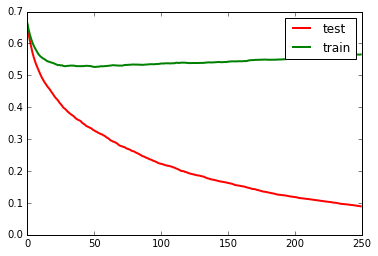

In [72]:
test_loss = train_losses_dict[0.1]
train_loss = test_losses_dict[0.1]
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [87]:
print np.argmin(test_losses_dict[0.2]) + 1
print min(test_losses_dict[0.2])

37
0.530918156803


На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba)



In [95]:
rf_train_losses_dict = {}
rf_test_losses_dict = {}
clf = RandomForestClassifier(n_estimators=37, verbose=0, random_state=241)
clf.fit(X_train, y_train)

log_loss(y_test, clf.predict_proba(X_test))

0.54091190993698968